## Normal Distribution

- A normal distribution also known as a Gaussian distribution.
- It is a probability distribution that describes a continuous random variable whose values tend to cluster around a central      value with fewer values located farther away from the center. 
- The distribution is bell-shaped and symmetrical around the mean and it is characterized by two parameters the mean which is     the central value around which the distribution is centered and the standard deviation which determines the spread or           variability of the distribution.

In [1]:
from scipy import stats

In [2]:
1 - stats.norm.cdf(720,711,29)   #to find P(X>720),mean=11,sd=29

0.37814937265194704

In [3]:
stats.norm.cdf(70,60,10)     #to find P(X<70),mean=60,sd=10

0.8413447460685429

In [4]:
1 - stats.norm.cdf(60,50,5)  #to find P(X>60),mean=50,sd=5

0.02275013194817921

In [5]:
import pandas as pd
import numpy as np

In [6]:
import warnings                        #to ignore warnings
warnings.filterwarnings('ignore')

In [10]:
beml_df = pd.read_csv("BEML.csv")
beml_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [11]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [12]:
beml_df = beml_df[['Date','Close']]
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [13]:
glaxo_df = glaxo_df[['Date','Close']]
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [14]:
#making date column into datetime datatype
glaxo_df['Date'] = pd.to_datetime(glaxo_df['Date'])

beml_df['Date'] = pd.to_datetime(beml_df['Date'])

In [15]:
glaxo_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [16]:
beml_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [17]:
#making date column as index
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date'])).drop('Date',axis=1)
glaxo_df                                                                    

,Close
Date,
2010-01-04,1625.65
2010-01-05,1616.80
2010-01-06,1638.50
2010-01-07,1648.70
2010-01-08,1639.80
...,...
2016-12-26,2723.50
2016-12-27,2701.75
2016-12-28,2702.15


In [18]:
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date'])).drop('Date',axis=1)
beml_df   

,Close
Date,
2010-01-04,1135.60
2010-01-05,1134.60
2010-01-06,1139.60
2010-01-07,1144.15
2010-01-08,1144.05
...,...
2016-12-26,950.25
2016-12-27,975.70
2016-12-28,974.40


Text(0, 0.5, 'Close')

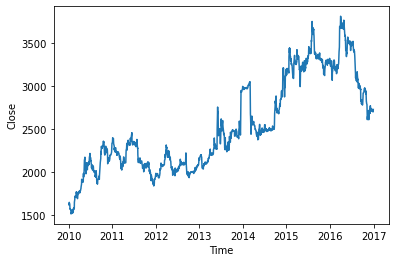

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

## matplotlib inline
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

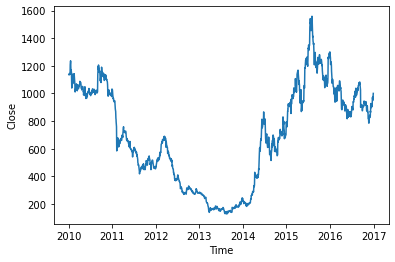

In [20]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close')

In [21]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods=1)
beml_df['gain'] = beml_df.Close.pct_change(periods=1)

In [22]:
glaxo_df   #  Calculating gain

,Close,gain
Date,,
2010-01-04,1625.65,NaN
2010-01-05,1616.80,-0.005444
2010-01-06,1638.50,0.013422
2010-01-07,1648.70,0.006225
2010-01-08,1639.80,-0.005398
...,...,...
2016-12-26,2723.50,-0.001283
2016-12-27,2701.75,-0.007986
2016-12-28,2702.15,0.000148


In [23]:
beml_df

,Close,gain
Date,,
2010-01-04,1135.60,NaN
2010-01-05,1134.60,-0.000881
2010-01-06,1139.60,0.004407
2010-01-07,1144.15,0.003993
2010-01-08,1144.05,-0.000087
...,...,...
2016-12-26,950.25,-0.021924
2016-12-27,975.70,0.026782
2016-12-28,974.40,-0.001332


In [24]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
glaxo_df

,Close,gain
Date,,
2010-01-05,1616.80,-0.005444
2010-01-06,1638.50,0.013422
2010-01-07,1648.70,0.006225
2010-01-08,1639.80,-0.005398
2010-01-11,1629.45,-0.006312
...,...,...
2016-12-26,2723.50,-0.001283
2016-12-27,2701.75,-0.007986
2016-12-28,2702.15,0.000148


In [25]:
beml_df = beml_df.dropna()
beml_df

,Close,gain
Date,,
2010-01-05,1134.60,-0.000881
2010-01-06,1139.60,0.004407
2010-01-07,1144.15,0.003993
2010-01-08,1144.05,-0.000087
2010-01-11,1137.00,-0.006162
...,...,...
2016-12-26,950.25,-0.021924
2016-12-27,975.70,0.026782
2016-12-28,974.40,-0.001332


In [26]:
#plotting the gains
import matplotlib.pyplot as plt

Text(0, 0.5, 'gain')

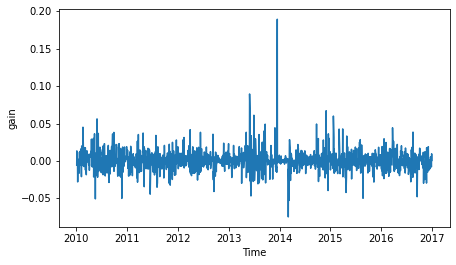

In [27]:
plt.figure(figsize=(7,4))
plt.plot(glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

Text(0, 0.5, 'gain')

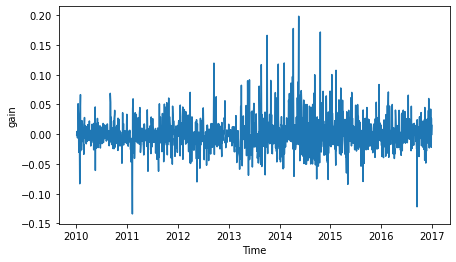

In [28]:
plt.figure(figsize=(7,4))
plt.plot(beml_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')

In [30]:
import seaborn as sns

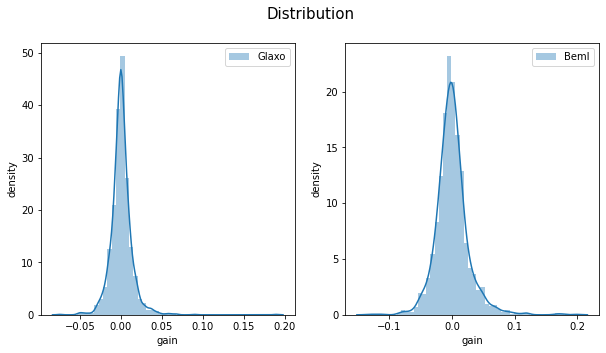

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle('Distribution',fontsize=15)

sn.distplot(glaxo_df.gain,label='Glaxo')

plt.xlabel('gain')
plt.ylabel('density')
plt.legend()

plt.subplot(1,2,2)
sn.distplot(beml_df.gain,label='Beml')

plt.xlabel('gain')
plt.ylabel('density')
plt.legend()

In [33]:
print('Mean:',round(glaxo_df.gain.mean(),4))
print('Standard Deviation:',round(glaxo_df.gain.std(),4))

Mean: 0.0004
Standard Deviation: 0.0134


In [34]:
print('Mean:',round(beml_df.gain.mean(),4))
print('Standard Deviation:',round(beml_df.gain.std(),4))

Mean: 0.0003
Standard Deviation: 0.0264


In [35]:
# import scipy
from scipy import stats

#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf(-0.02, 0.0004,0.0134)

0.06395593743937553

In [36]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,0.0004, 0.0134)

0.07177658173190637

In [37]:
#Probability of making 2% loss or higher in Beml
stats.norm.cdf(-0.02,0.0007,0.0407)

0.3055164867412168

In [38]:
#Probability of making 2% gain or higher in Beml
1 - stats.norm.cdf(0.02,0.0007,0.0407)

0.3176781211102836

## PDF(Probability Density Function)

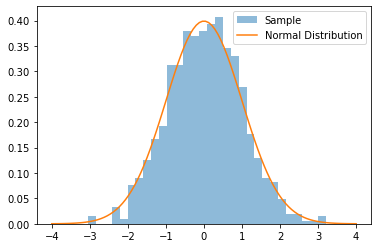

In [39]:
import numpy as np
from scipy.stats import norm

# Define the parameters of the normal distribution
mu = 0 # mean
sigma = 1 # standard deviation

# Generate a sample of random values from the normal distribution
sample_size = 1000
sample = np.random.normal(mu, sigma, sample_size)

# Calculate the mean and standard deviation of the sample
sample_mean = np.mean(sample)
sample_std = np.std(sample)

# Calculate the probability density function (PDF) of the normal distribution
x_values = np.linspace(-4, 4, 100) # x-values for the PDF plot
pdf_values = norm.pdf(x_values, mu, sigma) # PDF values for the x-values

# Plot the PDF of the normal distribution and the histogram of the sample
import matplotlib.pyplot as plt
plt.hist(sample, bins=30, density=True, alpha=0.5, label='Sample')
plt.plot(x_values, pdf_values, label='Normal Distribution')
plt.legend()
plt.show()

## Cdf(Cumulative distribution function)

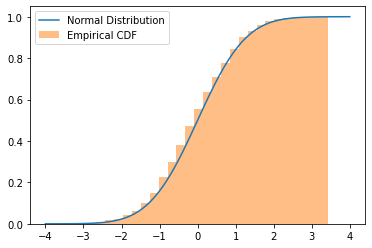

In [40]:
import numpy as np
from scipy.stats import norm

# Define the parameters of the normal distribution
mu = 0 # mean
sigma = 1 # standard deviation

# Generate a sample of random values from the normal distribution
sample_size = 1000
sample = np.random.normal(mu, sigma, sample_size)

# Calculate the mean and standard deviation of the sample
sample_mean = np.mean(sample)
sample_std = np.std(sample)

# Calculate the cumulative distribution function (CDF) of the normal distribution
x_values = np.linspace(-4, 4, 100) # x-values for the CDF plot
cdf_values = norm.cdf(x_values, mu, sigma) # CDF values for the x-values

# Plot the CDF of the normal distribution and the empirical CDF of the sample
import matplotlib.pyplot as plt
plt.plot(x_values, cdf_values, label='Normal Distribution')
plt.hist(sample, bins=30, density=True, cumulative=True, alpha=0.5, label='Empirical CDF')
plt.legend()
plt.show()